# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БСТ2105 Ананьев В.Д 


***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



## Построение графа

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random, randint
import numpy as np
import pandas as pd

In [ ]:
def generate(num_nodes, density):
    min, max = int(input("Введите мин значение для пути: ")), int(input("Введите макс значение для пути: "))
    
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random() < density:
                weight = randint(min, max)
                adj_matrix[i][j] = weight
    
    return adj_matrix

Введите количество вершин: 6
Введите мин значение для пути: 1
Введите макс значение для пути: 6
Матрица смежности:
[0, 6, 0, 0, 6, 0]
[6, 0, 4, 6, 0, 3]
[0, 4, 0, 4, 2, 0]
[0, 6, 4, 0, 5, 0]
[6, 0, 2, 5, 0, 4]
[0, 3, 0, 0, 4, 0]


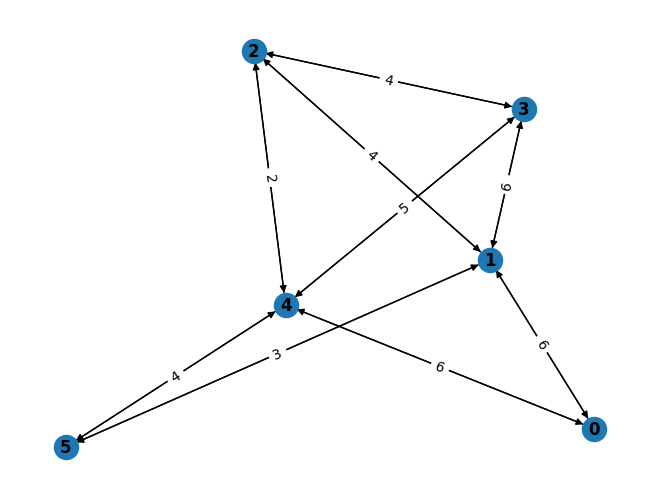

In [ ]:
n = int(input("Введите количество вершин: "))
adj_matrix = generate(n, 0.6)
print("Матрица смежности:")
for row in adj_matrix:
    print(row)

G = nx.DiGraph(np.matrix(adj_matrix))
layout = nx.spring_layout(G)
edge_weight = nx.get_edge_attributes(G, "weight")
nx.draw(G, layout, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_weight)
plt.show()

## Алгоритм Флойда-Уоршелла

In [ ]:
import math, copy
matrix = copy.deepcopy(adj_matrix)
def floyd(matrix, start=0, end=len(adj_matrix)-1):
  n = len(matrix)
  dist = [ [math.inf for j in range(n)] for i in range(n)]
  P = [[v for v in range(n)] for _ in range(n)]

  def get_path(P, u, v):
          path = [u]
          while u != v:
              u = P[u][v]
              path.append(u)

          return path
          
  for i in range(n):
    for j in range(n):
      if matrix[i][j] > 0:
        dist[i][j] = matrix[i][j]
      dist[i][i] = 0

  for k in range(n):
    for i in range(n):
      for j in range(n):
        if dist[i][j] > dist[i][k] + dist[k][j]:
          dist[i][j] = dist[i][k] + dist[k][j]
          P[i][j] = k
  min_path = get_path(P, end, start)
  min_dist = math.inf
  if min_path:
      min_dist = 0
      for i in range(len(min_path)-1):
          min_dist += matrix[min_path[i]][min_path[i+1]]
      print("min distance is ",min_dist)
                    
  return min_path
print(floyd(matrix, 0, 1))

min distance is  6
[1, 0]


## Алгоритм Дейкстры

In [ ]:
def dijkstra(adj_matrix: list, start: int =0, end: int =len(adj_matrix)-1) -> tuple[list, int]:
    n = len(adj_matrix)
    visited = [False] * n
    distance = [math.inf] * n
    path = [[] for _ in range(n)]
    distance[start] = 0
    path[start].append(start)

    for _ in range(n):
        u = min_distance_index(distance, visited)
        visited[u] = True
        for v in range(n):
            if adj_matrix[u][v] != 0 and not visited[v]:
                if distance[u] + adj_matrix[u][v] < distance[v]:
                    distance[v] = distance[u] + adj_matrix[u][v]
                    path[v] = path[u] + [v]
    return path, distance


def min_distance_index(distance, visited):
    min_distance = math.inf
    min_index = -1
    for i in range(len(distance)):
        if not visited[i] and distance[i] < min_distance:
            min_distance = distance[i]
            min_index = i
    return min_index

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = dijkstra(adj_matrix, start)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

Start: 0
End: 4
[0, 4] минимальный путь, 6 минимальное расстояние


## Алгоритм Беллмана-Форда

In [ ]:
matrix = copy.deepcopy(adj_matrix)
def bellman_ford(matrix: list, start: int =0, end: int =len(adj_matrix)-1) -> tuple[list, int]:
    
    path_lengths = [math.inf for item in matrix]
    path_lengths[start] = 0
    paths = [[start] for item in matrix]
    n = len(matrix)
    
    for i in range(n):
        for u in range(n):
             for v in range(n):
                    if path_lengths[u] != math.inf and matrix[u][v] != math.inf and path_lengths[v] > path_lengths[u] + matrix[u][v]:
                        path_lengths[v] = path_lengths[u] + matrix[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    if len(paths[end]) == 1:
        return [],0
    return paths, path_lengths

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = bellman_ford(matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

## Алгоритм Джонсона

In [ ]:
matrix = copy.deepcopy(adj_matrix)
def johnson(matrix, start=0, end=len(adj_matrix)-1):
    
    n = len(matrix)
    mat_new = matrix.copy() 
    for item in mat_new:
        item.append(math.inf) 
    mat_new.append([])
    for i in range(len(mat_new)):
        mat_new[-1].append(0)
    paths, bell_dist = bellman_ford(mat_new, len(mat_new)-1, 0)
    for u in range(n):
        for v in range(n):
            if matrix[u][v] != math.inf and bell_dist[u] != math.inf and bell_dist[v] != math.inf:
                matrix[u][v] += bell_dist[u] - bell_dist[v]
    final_dist = []
    final_paths = []
    for i in range(n-1):
            path, dist = dijkstra(matrix, i, n-1)
            final_dist.append(dist)
            final_paths.append(path)
    final_dist.append([])
    final_paths.append([])
    for i in range(n):
        final_paths[-1].append([end])
        if i == n-1:
            final_dist[-1].append(start)
        else:
            final_dist[-1].append(math.inf)
    if len(final_paths[start][end]) == 1:
        return [], 0
    return final_paths, final_dist

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = johnson(matrix, start, end)
print(f"{path[end][start]} минимальный путь, {dist[start][end]} минимальное расстояние")

## Алгоритм Левита

In [ ]:
matrix = copy.deepcopy(adj_matrix)
def levit(matrix, start=0, end=len(adj_matrix)-1):
    
    n = len(matrix)
    
    M0 = set()
    M1 = {'main': [start], 'urgent': []}
    M2 = set(range(1, n+1))
    dist = [math.inf for item in matrix]
    dist[start] = 0
    paths = [[start] for item in matrix]
    while len(M1['main']) or len(M1['urgent']):
        if len(M1['urgent']):
            u = M1['urgent'].pop(0)
        else:
            u = M1['main'].pop(0)
        for v in range(n):
            if dist[u] == math.inf or matrix[u][v] == math.inf:
                continue
            if v in M2:
                M2.remove(v)
                M1['main'].append(v)
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M1['main'] or v in M1['urgent']:
                if dist[v] > dist[u] + matrix[u][v]:
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
                    dist[v] = dist[u] + matrix[u][v]
            elif v in M0 and dist[v] > dist[u] + matrix[u][v]:
                M0.remove(v)
                M1['urgent'].append(v)
                dist[v] = dist[u] + matrix[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        M0.add(u)
    if len(paths[end]) == 1:
             return [], 0
    return paths, dist

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = levit(matrix, start, end)
print(f"{path[end]} минимальный путь, {dist[end]} минимальное расстояние")

## Алгоритм Йена

In [ ]:
matrix = copy.deepcopy(adj_matrix)
def yen(matrix, start=0, end=len(adj_matrix)-1, K=0):
    
    n = len(matrix)
    
    candidates = set()
    original_paths, original_dists = dijkstra(adj_matrix, start, end)
    paths = [original_paths[end]]
    lengths = [original_dists[end]]
    for k in range(K):
        for i in range(len(paths[-1])-1):
            #постепенно выбираем корневой путь и вершину ветвления
            spur_node = paths[-1][i]
            root_path = paths[-1][:i+1]
            for j in range(len(root_path)): #удаляем из графа вершины, идущие в пути перед вершиной ветвления (к ним мы не можем возвращаться)
                if root_path[j] != spur_node:
                    matrix[root_path[j]] = [math.inf for l in range(len(matrix))]
            for path in paths: #в списке path находим пути, которые начинаются с корневого пути
                if root_path == path[:i+1]:
                    matrix[path[i]][path[i+1]] = math.inf #удаляем следующие ребра в найденных путях, чтоб начать минимальное ветвление
            original_paths, original_dists = dijkstra(matrix, spur_node, end) # находим кратчайший путь в изменёном графе
            if len(original_paths):
                total_dist = 0
                spur_path = original_paths[end][1:] #определяем путь ветвления без начальной вершины в найденном пути, т.к. она есть в корневом пути
                total_path = root_path
                total_path.extend(spur_path)
                total_path = tuple(total_path) #преобразовываем список в кортеж, чтобы добавить его в набор кандидатов
                for j in range(len(total_path)-1):
                    total_dist += adj_matrix[total_path[j]][total_path[j+1]]
                candidates.add((total_path, total_dist))
        if not candidates:
            break
        sorted_candidates = list(candidates) # преобразовавыем набор кандидатов в список чтобы остортировать его по длинам маршртуа
        sorted_candidates.sort(key = lambda x: x[1])
        paths.append(list(sorted_candidates[0][0])) #добавляем в список paths минимальный путь
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0]) # удаляем минимальный путь из набора кандидатов
    return paths, lengths

In [ ]:
start, end = int(input("Start: ")), int(input("End: "))
path, dist = yen(matrix, start, end)
print(f"{path} минимальный путь, {dist[0]} минимальное расстояние")

## Сравнение алгоритмов!

In [ ]:
matrix1 = [] 
min, max = 1, 50

def generate_matrix(num_nodes, density, min, max):
    adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    
    for i in range(num_nodes):
        for k in range(0, i):
            adj_matrix[i][k] = adj_matrix[k][i]
        for j in range(i, num_nodes):
            if i == j:
                adj_matrix[i][j] = 0
            elif random() < density:
                weight = randint(min, max)
                adj_matrix[i][j] = weight
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if i != j and adj_matrix[i][j] == 0:
                adj_matrix[i][j] = math.inf
    
    return adj_matrix


for i in range(1,11):
    a = generate_matrix(50*i, 0.8, min, max)
    matrix1.append(a)
for matr in matrix1:
  print(matr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



min distance is  4
50 вершин:  0.03 cекунд
min distance is  9
100 вершин:  0.19 cекунд
min distance is  6
150 вершин:  0.64 cекунд
min distance is  2
200 вершин:  2.56 cекунд
min distance is  43
250 вершин:  3.57 cекунд
min distance is  37
300 вершин:  6.5 cекунд


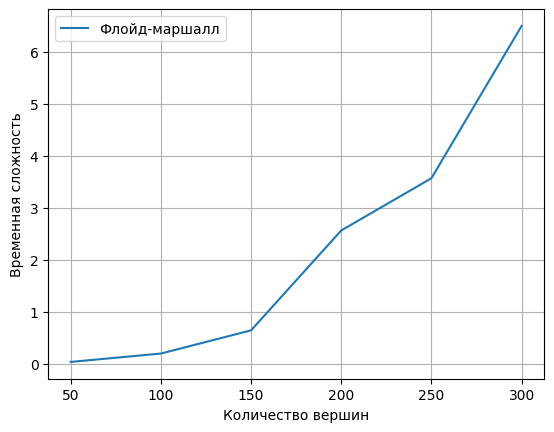

In [ ]:
import time
elements_slow = []
times_floyd = list()
for k in range(len(matrix1)-4):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    floyd(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    elements_slow.append(50*(k+1))
    times_floyd.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements_slow, times_floyd, label ='Флойд-маршалл')
plt.grid()
plt.legend()
plt.show() 

50 вершин:  0.0 cекунд
100 вершин:  0.01 cекунд
150 вершин:  0.02 cекунд
200 вершин:  0.02 cекунд
250 вершин:  0.03 cекунд
300 вершин:  0.05 cекунд
350 вершин:  0.06 cекунд
400 вершин:  0.08 cекунд
450 вершин:  0.1 cекунд
500 вершин:  0.16 cекунд


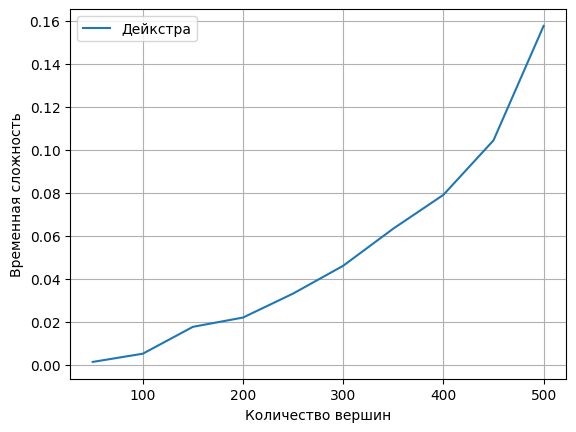

In [ ]:
elements = []
times_dijkstra = list()
for k in range(len(matrix1)):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    dijkstra(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    elements.append(50*(k+1))
    times_dijkstra.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_dijkstra, label ='Дейкстра')
plt.grid()
plt.legend()
plt.show()

50 вершин:  0.06 cекунд
100 вершин:  0.38 cекунд
150 вершин:  1.27 cекунд
200 вершин:  2.89 cекунд
250 вершин:  7.09 cекунд
300 вершин:  11.13 cекунд


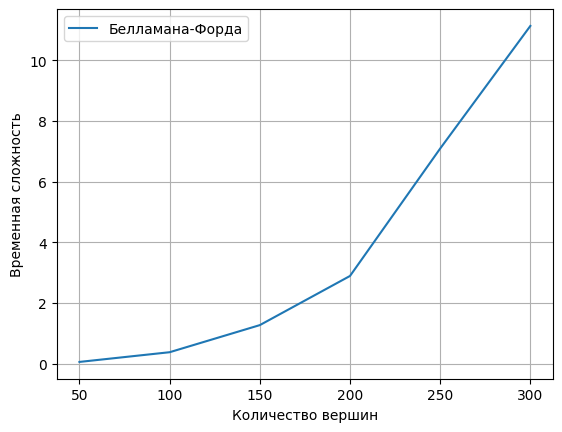

In [ ]:
times_bellman = list()
for k in range(len(matrix1)-4):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    bellman_ford(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_bellman.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements_slow, times_bellman, label ='Белламана-Форда')
plt.grid()
plt.legend()
plt.show()

50 вершин:  0.1 cекунд
100 вершин:  0.66 cекунд
150 вершин:  2.37 cекунд
200 вершин:  6.45 cекунд
250 вершин:  11.19 cекунд
300 вершин:  18.89 cекунд


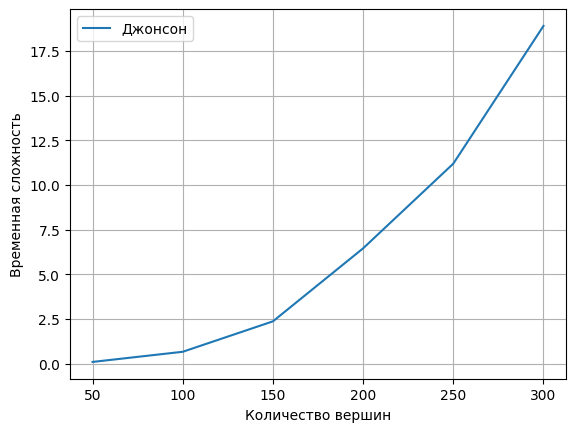

In [ ]:
times_johnson = list()
for k in range(len(matrix1)-4):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    johnson(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_johnson.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements_slow, times_johnson, label ='Джонсон')
plt.grid()
plt.legend()
plt.show()

50 вершин:  0.01 cекунд
100 вершин:  0.03 cекунд
150 вершин:  0.1 cекунд
200 вершин:  0.25 cекунд
250 вершин:  0.32 cекунд
300 вершин:  0.49 cекунд
350 вершин:  0.37 cекунд
400 вершин:  0.48 cекунд
450 вершин:  0.68 cекунд
500 вершин:  0.86 cекунд


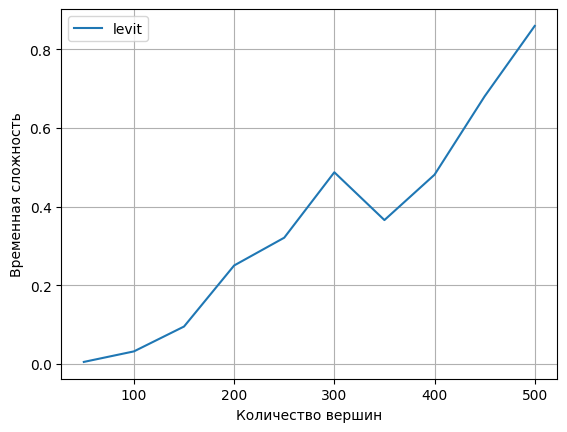

In [ ]:
times_levit = list()
for k in range(len(matrix1)):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    levit(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_levit.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements, times_levit, label ='levit')
plt.grid()
plt.legend()
plt.show()

50 вершин:  0.0 cекунд
100 вершин:  0.0 cекунд
150 вершин:  0.0 cекунд
200 вершин:  0.0 cекунд
250 вершин:  0.0 cекунд
300 вершин:  0.0 cекунд


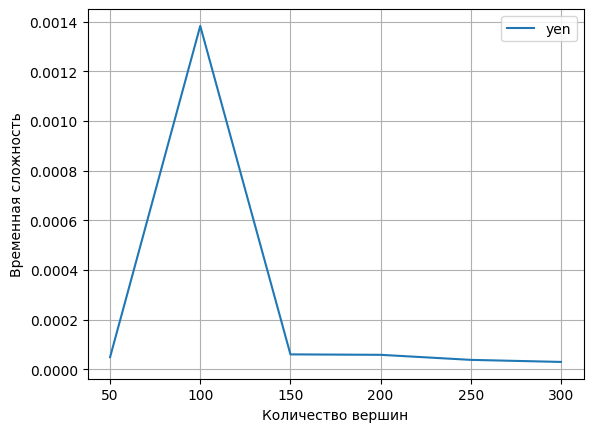

In [ ]:
times_yen = list()
for k in range(len(matrix1)-4):
    a = copy.copy(matrix1[k])
    start = time.perf_counter()
    yen(a, 0)
    end = time.perf_counter()
    print(50*(k+1), "вершин: ", round(end-start, 2), "cекунд")
    times_yen.append(end-start)

plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements_slow, times_yen, label ='yen')
plt.grid()
plt.legend()
plt.show()

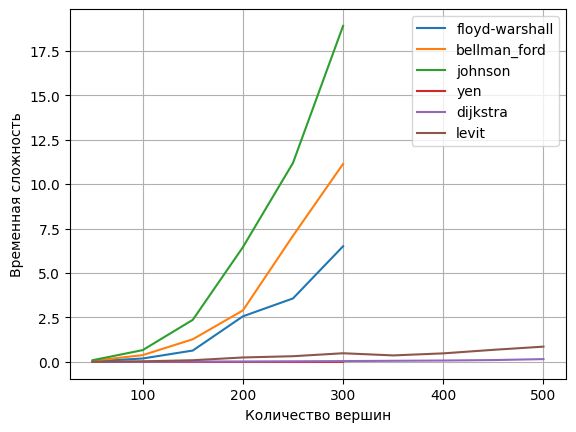

In [ ]:
plt.xlabel('Количество вершин')
plt.ylabel('Временная сложность')
plt.plot(elements_slow, times_floyd, label ='floyd-warshall')
plt.plot(elements_slow, times_bellman, label ='bellman_ford')
plt.plot(elements_slow, times_johnson, label ='johnson')
plt.plot(elements_slow, times_yen, label ='yen')
plt.plot(elements, times_dijkstra, label ='dijkstra')
plt.plot(elements, times_levit, label ='levit')

plt.grid()
plt.legend()
plt.show()

In [ ]:
index = [50, 100, 150, 200, 250, 300]
dtFrame = pd.DataFrame({'Флойд-Уоршелла': [times_floyd[i] for i in range(6)],
                        'Дейкстра': [times_dijkstra[i] for i in range(6)],
                        'Беллман-Форд': [times_bellman[i] for i in range(6)],
                        'Джонсон': [times_johnson[i] for i in range(6)],
                        'Йена': [times_yen[i] for i in range(6)],
                        'Левита': [times_levit[i] for i in range(6)]
                        }, index=index)
dtFrame

,Флойд-Уоршелла,Дейкстра,Беллман-Форд,Джонсон,Йена,Левита
50,0.031636,0.001371,0.061508,0.096108,0.000049,0.005284
100,0.192866,0.005192,0.381282,0.663939,0.001383,0.032082
150,0.639848,0.017689,1.274415,2.366171,0.000060,0.095268
200,2.563275,0.022006,2.894015,6.451147,0.000058,0.250473
250,3.569471,0.033163,7.093589,11.188481,0.000038,0.321103
300,6.502617,0.046095,11.134058,18.892978,0.000030,0.487482


### Выполнение:

### Вывод